In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**QUESTION 1**

### **1**

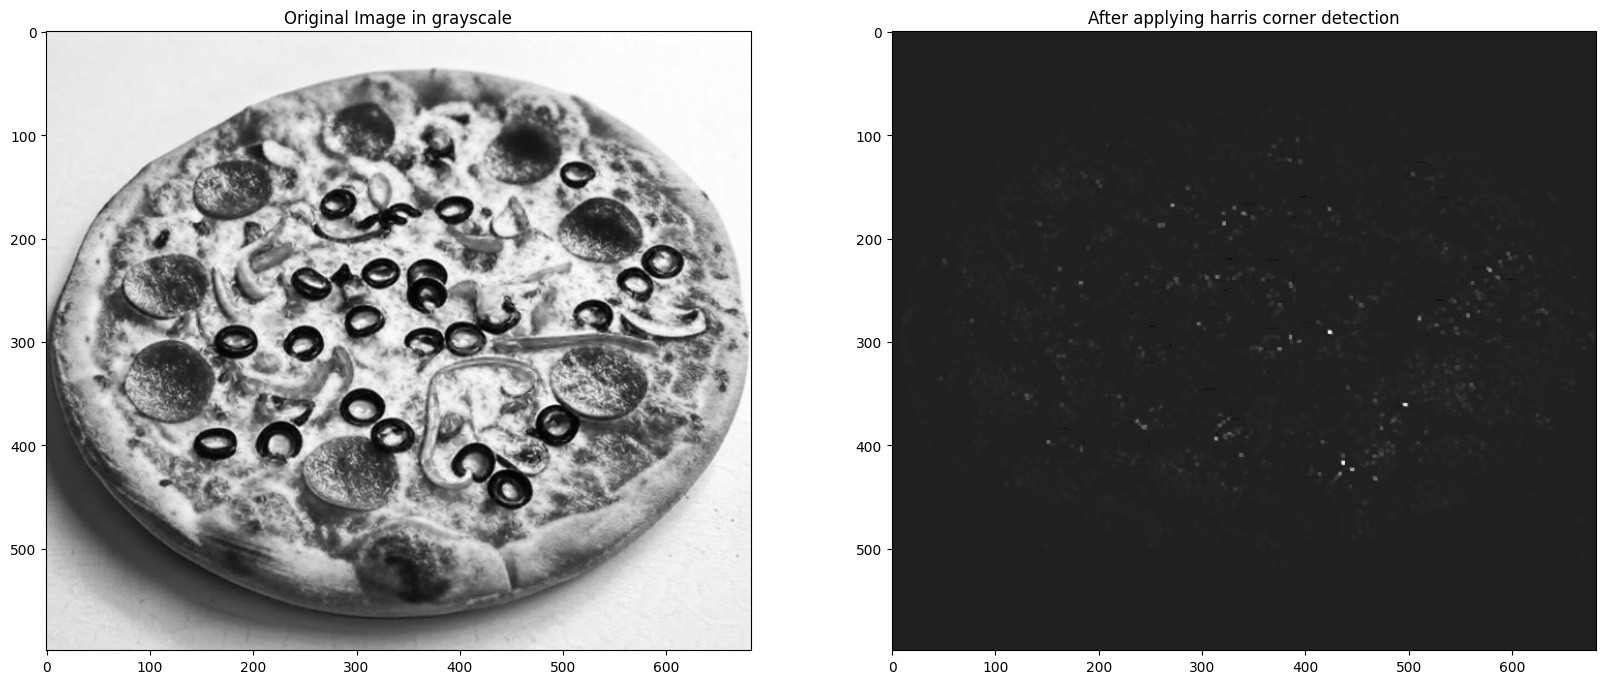

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Lab3/Question-01/pizza.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)

# Applying harris corner detection

harris_pizza = cv2.cornerHarris(gray, 2, 3, 0.04)
corners = cv2.dilate(harris_pizza, None, iterations = 1)

plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title('Original Image in grayscale')
plt.imshow(gray, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('After applying harris corner detection')
plt.imshow(corners, cmap = 'gray')

In [ ]:
print("No it does not detect corners on pepperoni slices")
print("No the crust edges are not defined as corners")
print("Due to the uneven spread of the cheese, in some areas it gets brighter in grayscale version resulting in creating a sharp contrast with the toppings surrounding it,and hence some of those tiny areas are detected as corners")

No it does not detect corners on pepperoni slices
No the crust edges are not defined as corners
Due to the uneven spread of the cheese, in some areas it gets brighter in grayscale version resulting in creating a sharp contrast with the toppings surrounding it,and hence some of those tiny areas are detected as corners


### **2**

In [ ]:
print("Harris corner detection depends on sharp change in intensity to detect corners. But in case of circular shapes or irregular toppings, they lack such sharp changes and corner like intersections, which makes the Harris corner detection struggle to detect them")

Harris corner detection depends on sharp change in intensity to detect corners. But in case of circular shapes or irregular toppings, they lack such sharp changes and corner like intersections, which makes the Harris corner detection struggle to detect them


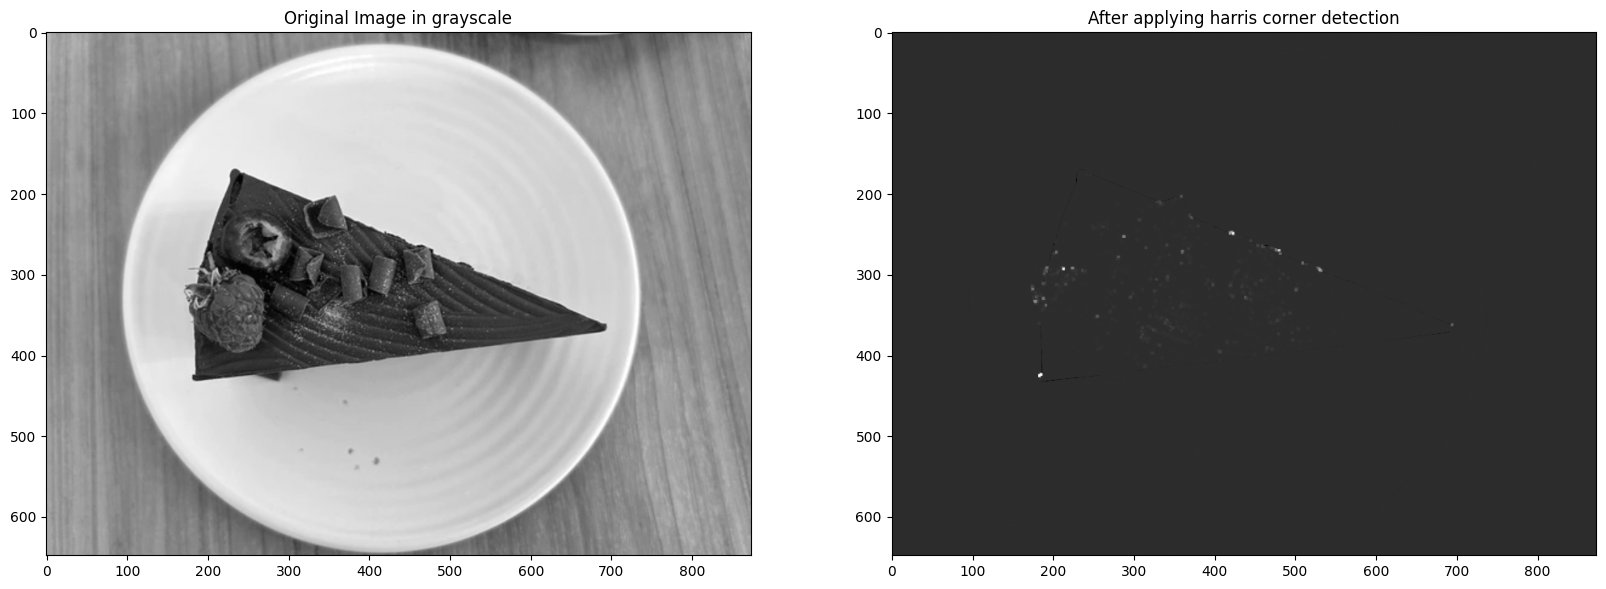

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Lab3/Question-01/cake.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)

# Applying harris corner detection

harris_pizza = cv2.cornerHarris(gray, 2, 3, 0.04)
corners = cv2.dilate(harris_pizza, None, iterations = 1)


plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title('Original Image in grayscale')
plt.imshow(gray, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('After applying harris corner detection')
plt.imshow(corners, cmap = 'gray')

In [ ]:
print("When used a triangular slice of cake its corners are easily detected due to expected sharp change in intensity. Therefore, the triangular slice of cake makes Harris happiest.")

When used a triangular slice of cake its corners are easily detected due to expected sharp change in intensity. Therefore, the triangular slice of cake makes Harris happiest.


#**QUESTION 2**

### ***Part 1***

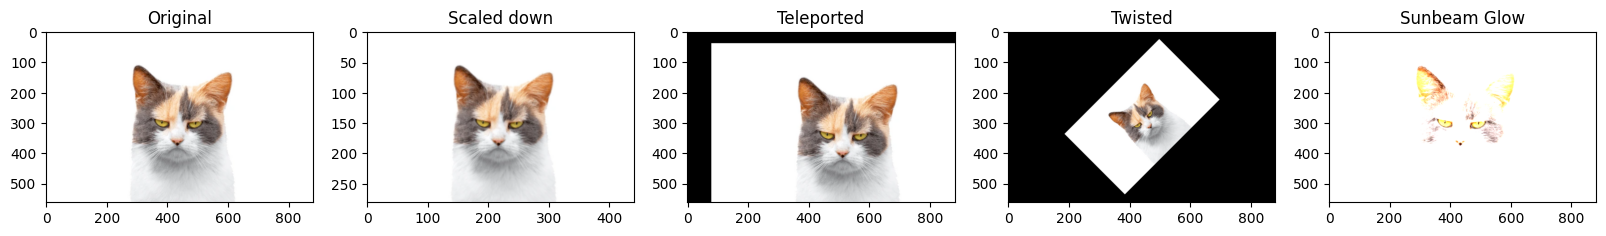

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Lab3/Question-02/cat.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# shrinking image
smaller_img = cv2.pyrDown(img)

# Teleport image
shift_towards_x = 80
shift_towards_y = 40

translation_matrix = np.float32([[1,0,shift_towards_x],
                                 [0, 1, shift_towards_y]])

teleported_img = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))


# Rotating image
X = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 45, 0.5)

rotated_image = cv2.warpAffine(img, X, (img.shape[1], img.shape[0]))

# Sunbeam glow
bright_img = np.clip(img * 2.5, 0, 255)
bright_img = bright_img.astype(np.uint8)


f, (p1, p2, p3, p4, p5) = plt.subplots(1, 5, figsize = (20,10))

p1.set_title("Original")
p1.imshow(img)
p2.set_title("Scaled down")
p2.imshow(smaller_img)
p3.set_title("Teleported")
p3.imshow(teleported_img)
p4.set_title("Twisted")
p4.imshow(rotated_image)
p5.set_title("Sunbeam Glow")
p5.imshow(bright_img)

### ***Part 2***

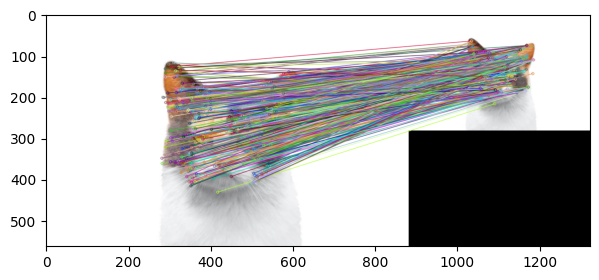

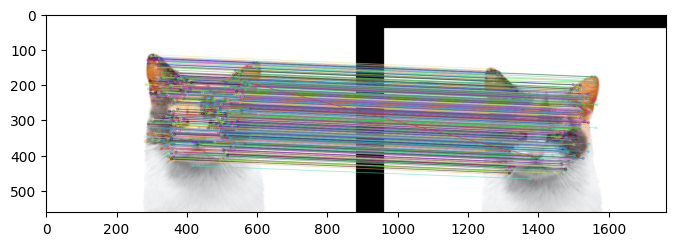

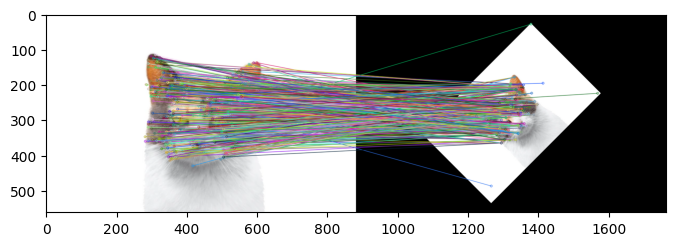

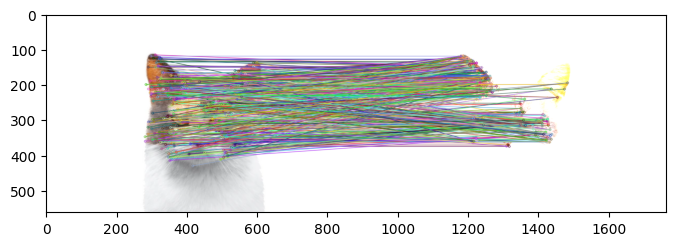

In [ ]:
training_image = img
testing_image_list = [smaller_img,teleported_img,rotated_image,bright_img]

for testing_image in testing_image_list:

    train_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

    test_gray = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)

    sift = cv2.SIFT_create()

    train_point, train_desc = sift.detectAndCompute(train_gray, None)
    test_point, test_desc = sift.detectAndCompute(test_gray, None)

    points_with_no_size = np.copy(testing_image)
    points_with_size = np.copy(testing_image)

    cv2.drawKeypoints(testing_image, test_point, points_with_no_size, color = (0, 255, 0))

    cv2.drawKeypoints(testing_image, test_point, points_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


    # matching meow

    brute_force_matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

    matchs = sorted(brute_force_matcher.match(train_desc, test_desc),key = lambda x: x.distance )

    final = cv2.drawMatches(training_image, train_point, testing_image, test_point, matchs, testing_image, flags = 2)


    plt.figure(figsize=(8,3))
    plt.imshow(final)
    plt.show()
    plt.close()


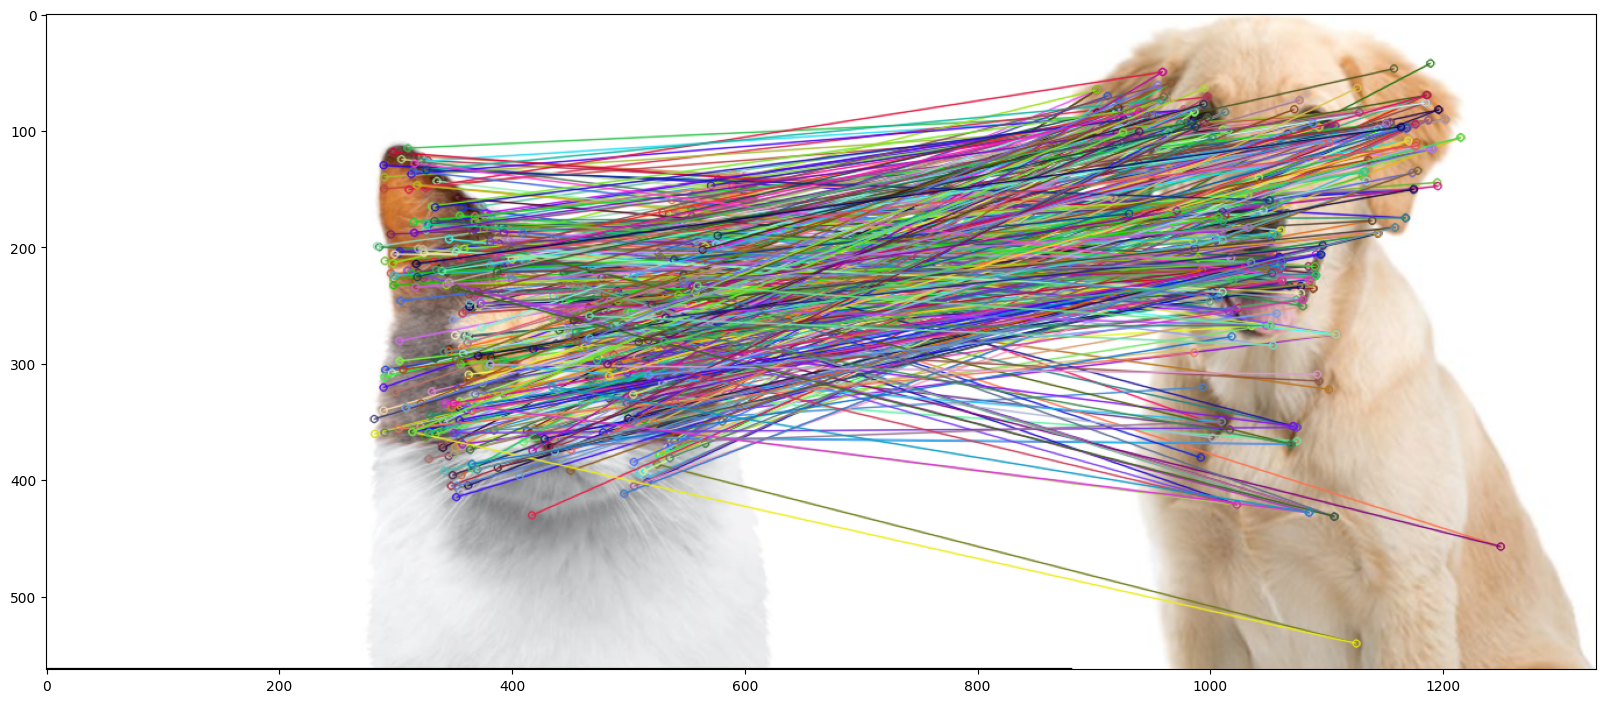

In [ ]:
# as dog

dog = cv2.imread("/content/drive/MyDrive/Lab3/Question-02/dog.png", cv2.IMREAD_COLOR)
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

training_image = img
testing_image = dog

train_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
test_gray = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)
sift = cv2.SIFT_create()
train_point, train_desc = sift.detectAndCompute(train_gray, None)
test_point, test_desc = sift.detectAndCompute(test_gray, None)
points_with_no_size = np.copy(testing_image)
points_with_size = np.copy(testing_image)
cv2.drawKeypoints(testing_image, test_point, points_with_no_size, color = (0, 255, 0))
cv2.drawKeypoints(testing_image, test_point, points_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# matching meow
brute_force_matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)
matchs = sorted(brute_force_matcher.match(train_desc, test_desc),key = lambda x: x.distance )
final = cv2.drawMatches(training_image, train_point, testing_image, test_point, matchs, testing_image, flags = 2)

plt.figure(figsize=(20,30))
plt.imshow(final)
plt.show()
plt.close()

In [ ]:
print("Due to some simillarities in texture between the dog and the cat, SIFT detects matches in some parts of the image")

Due to some simillarities in texture between the dog and the cat, SIFT detects matches in some parts of the image


#**QUESTION 3**

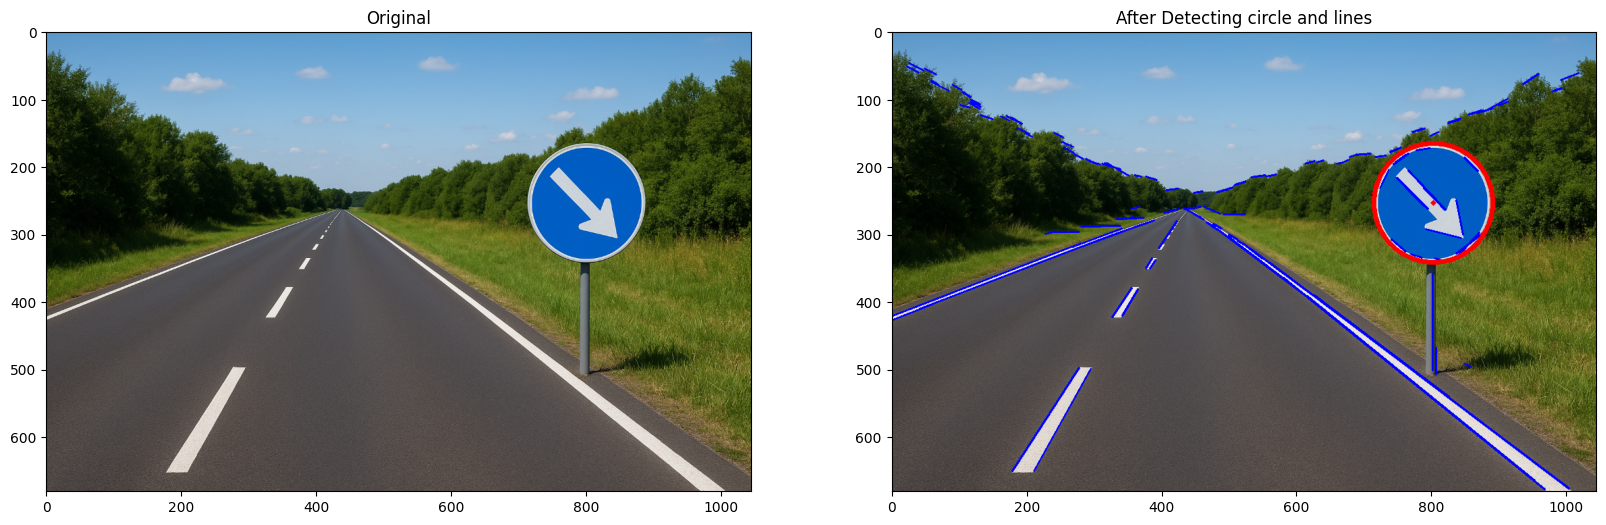

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Lab3/Question-03/road.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# Adding gaussian blur
gaussian_gray = cv2.GaussianBlur(gray, (9,9), 2)

# applying canny edge
lower_threshold = 50
higher_threshold = 100
edges = cv2.Canny(gaussian_gray, lower_threshold, higher_threshold)

# Hough Transformation
rho = 1

theta = np.pi/180
threshold = 35
min_line_size = 10
max_line_difference = 10

houghed_gray = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_size, max_line_difference)

img1 = np.copy(img)

for i in houghed_gray:
    for x1, y1, x2, y2 in i:
        cv2.line(img1, (x1, y1), (x2, y2), (0,0, 255), 2)

# Finding circles

all_circle = cv2.HoughCircles(gaussian_gray, cv2.HOUGH_GRADIENT, 1, 100,  param1 = 200, param2 = 130, minRadius=0, maxRadius=0)

if all_circle is not None:

    all_circle = np.uint16(np.around(all_circle))

    for i in all_circle[0,:]:
        cv2.circle(img1, (i[0], i[1]), i[2], (255,0,0), 5)
        cv2.circle(img1, (i[0], i[1]), 2, (255,0,0), 3)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

plt.title("Original")

plt.imshow(img)

plt.subplot(1,2,2)

plt.title("After Detecting circle and lines")

plt.imshow(img1)
